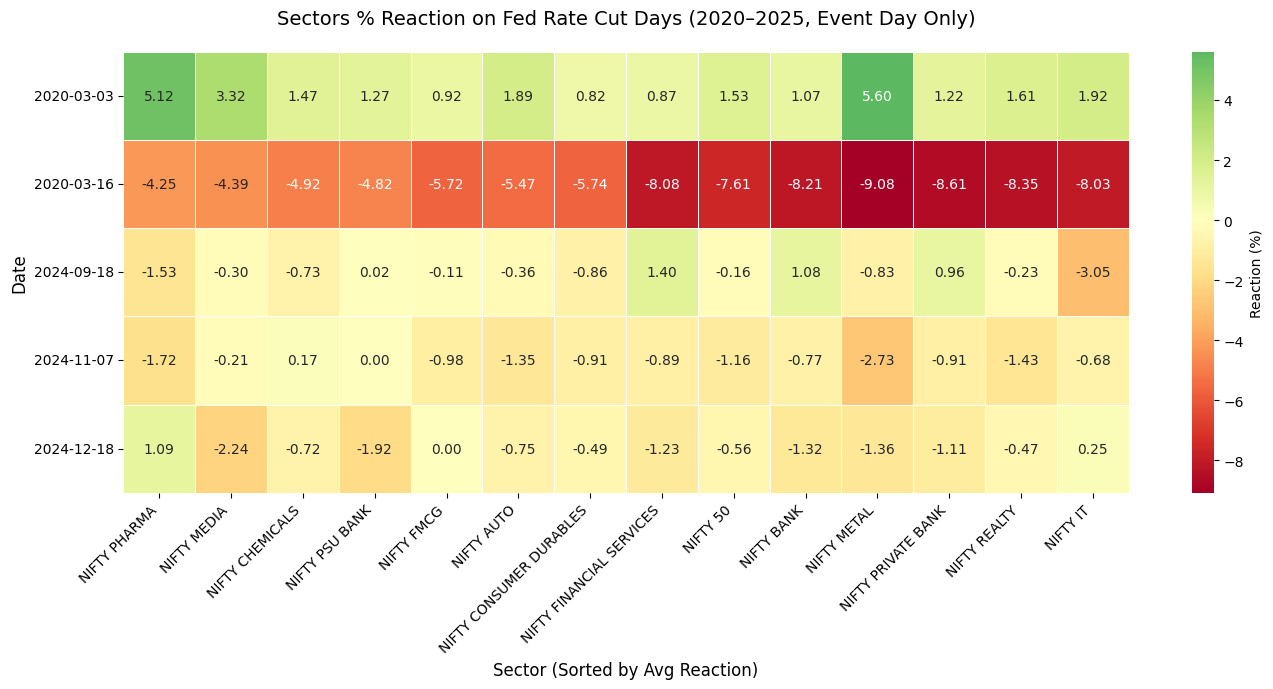

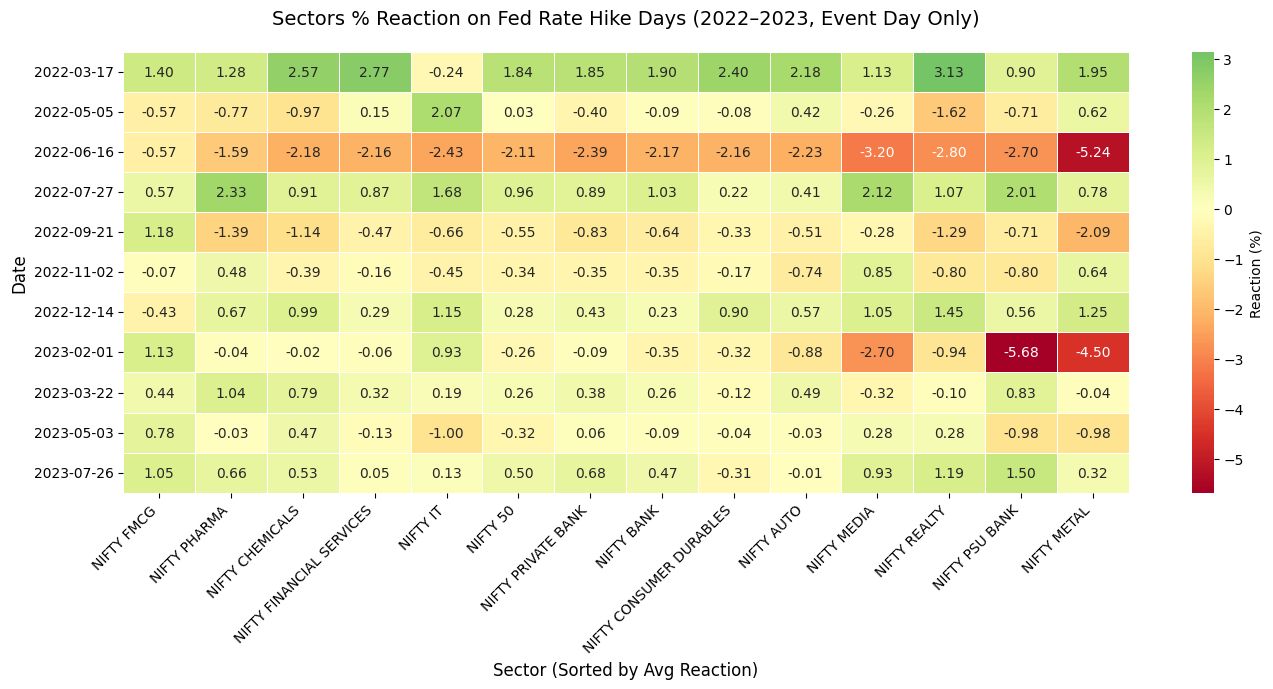

In [4]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Folder Path ---
DATA_FOLDER = r"C:\Users\sohan\Downloads\archive (1)"  # update if needed

# --- Load all sector CSVs ---
csv_files = sorted(glob.glob(os.path.join(DATA_FOLDER, "*_cleaned.csv")))
sector_series = {}

for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    if "Nifty HealthCare" in name:  # skip healthcare
        continue
    name = name.replace("_cleaned", "")
    df = pd.read_csv(f, parse_dates=["Date"])
    df = df.drop_duplicates(subset="Date").sort_values("Date").reset_index(drop=True)
    s = df.set_index("Date")["Close"].astype(float)
    s = s[~s.index.duplicated(keep="first")]
    sector_series[name] = s

# --- Fed Rate Cut Dates (2020–2025) ---
fed_cut_dates_str = [
    "2020-03-03","2020-03-16",
    "2024-09-18","2024-11-07","2024-12-18"
]
fed_cut_dates = [pd.to_datetime(x) for x in fed_cut_dates_str]

# --- Fed Rate Hike Dates (2022–2023) ---
fed_hike_dates_str = [
    "2022-03-17","2022-05-05","2022-06-16","2022-07-27","2022-09-21",
    "2022-11-02","2022-12-14","2023-02-01","2023-03-22","2023-05-03","2023-07-26"
]
fed_hike_dates = [pd.to_datetime(x) for x in fed_hike_dates_str]

# --- Function to compute sector reactions ---
def compute_reaction(dates, sector_series):
    reaction_table = pd.DataFrame(
        index=[d.strftime("%Y-%m-%d") for d in dates],
        columns=sector_series.keys(),
        dtype=float
    )
    for d in dates:
        for name, series in sector_series.items():
            if d in series.index:
                prev_idx = series.index.get_loc(d) - 1
                if prev_idx >= 0:
                    prev_day = series.index[prev_idx]
                    pct_change = ((series.loc[d] - series.loc[prev_day]) / series.loc[prev_day]) * 100
                    reaction_table.loc[d.strftime("%Y-%m-%d"), name] = pct_change
                else:
                    reaction_table.loc[d.strftime("%Y-%m-%d"), name] = np.nan
            else:
                reaction_table.loc[d.strftime("%Y-%m-%d"), name] = np.nan

    # Sort sectors by average reaction
    avg_reaction = reaction_table.mean().sort_values(ascending=False)
    reaction_table = reaction_table[avg_reaction.index]

    # Add average as new row
    reaction_table.loc["Average Reaction (%)"] = avg_reaction.values
    return reaction_table

# --- Compute reactions ---
reaction_cuts = compute_reaction(fed_cut_dates, sector_series)
reaction_hikes = compute_reaction(fed_hike_dates, sector_series)

# --- Make multi-line labels for readability ---
reaction_cuts.columns = [c.replace("_", "\n") for c in reaction_cuts.columns]
reaction_hikes.columns = [c.replace("_", "\n") for c in reaction_hikes.columns]

# --- Heatmap function ---
def plot_heatmap(reaction_table, title):
    plt.figure(figsize=(14, 7))
    ax = sns.heatmap(
        reaction_table.drop(index="Average Reaction (%)").astype(float),
        annot=True, fmt=".2f",
        cmap="RdYlGn", center=0,
        linewidths=0.5,
        cbar_kws={"label": "Reaction (%)"}
    )
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel("Date", fontsize=12)
    plt.xlabel("Sector (Sorted by Avg Reaction)", fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()

# --- Plot heatmaps ---
plot_heatmap(reaction_cuts, "Sectors % Reaction on Fed Rate Cut Days (2020–2025, Event Day Only)")
plot_heatmap(reaction_hikes, "Sectors % Reaction on Fed Rate Hike Days (2022–2023, Event Day Only)")



Fed Rate Cut Days: Sector Reaction (%) (2020–2025, Event Day Only)
                      NIFTY PHARMA  NIFTY MEDIA  NIFTY CHEMICALS  NIFTY PSU BANK  NIFTY FMCG  NIFTY AUTO  NIFTY CONSUMER DURABLES  NIFTY FINANCIAL SERVICES  NIFTY 50  NIFTY BANK  NIFTY METAL  NIFTY PRIVATE BANK  NIFTY REALTY  NIFTY IT
2020-03-03                    5.12         3.32             1.47            1.27        0.92        1.89                     0.82                      0.87      1.53        1.07         5.60                1.22          1.61      1.92
2020-03-16                   -4.25        -4.39            -4.92           -4.82       -5.72       -5.47                    -5.74                     -8.08     -7.61       -8.21        -9.08               -8.61         -8.35     -8.03
2024-09-18                   -1.53        -0.30            -0.73            0.02       -0.11       -0.36                    -0.86                      1.40     -0.16        1.08        -0.83                0.96         -0.23   

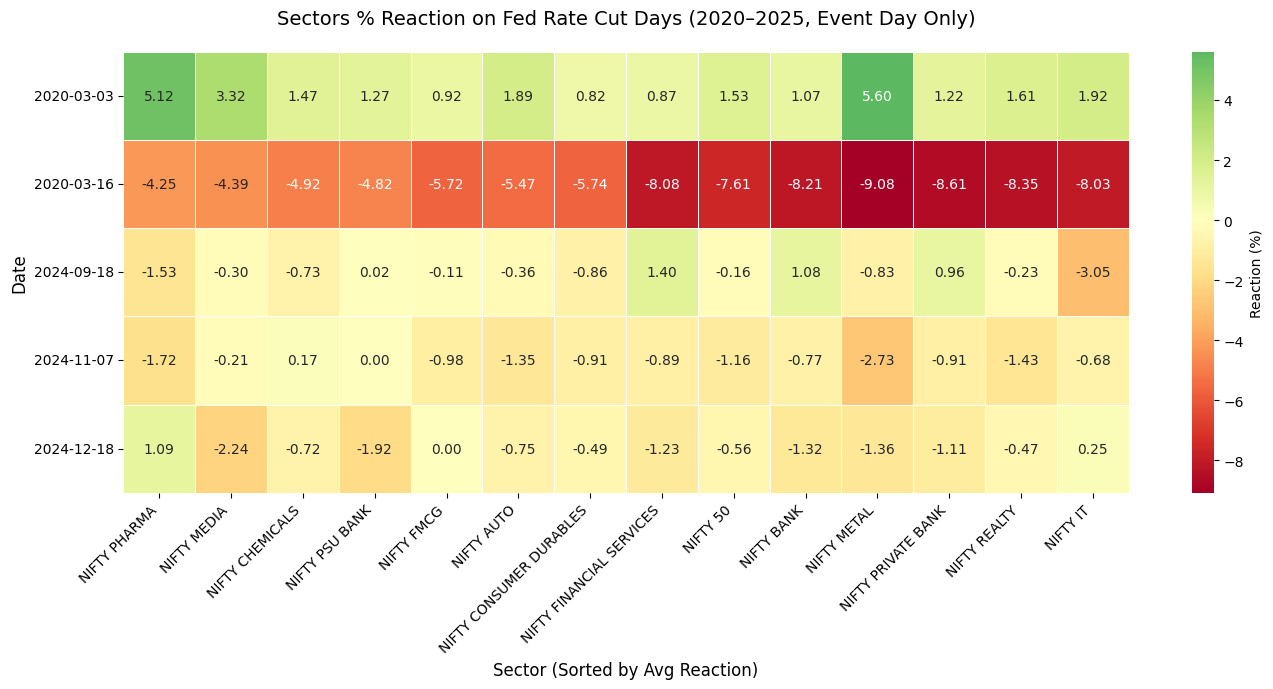

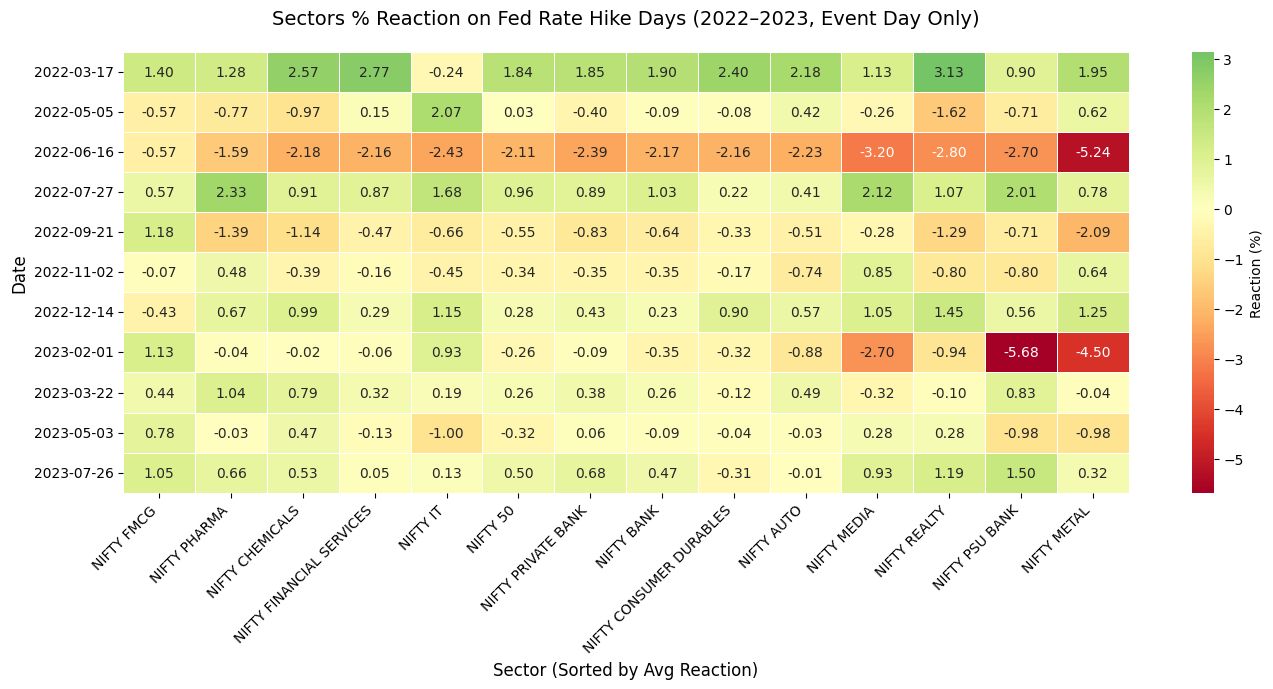

In [5]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Folder Path ---
DATA_FOLDER = r"C:\Users\sohan\Downloads\archive (1)"  # update if needed

# --- Load all sector CSVs ---
csv_files = sorted(glob.glob(os.path.join(DATA_FOLDER, "*_cleaned.csv")))
sector_series = {}

for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    if "Nifty HealthCare" in name:  # skip healthcare
        continue
    name = name.replace("_cleaned", "")
    df = pd.read_csv(f, parse_dates=["Date"])
    df = df.drop_duplicates(subset="Date").sort_values("Date").reset_index(drop=True)
    s = df.set_index("Date")["Close"].astype(float)
    s = s[~s.index.duplicated(keep="first")]
    sector_series[name] = s

# --- Fed Rate Cut Dates (2020–2025) ---
fed_cut_dates_str = [
    "2020-03-03","2020-03-16",
    "2024-09-18","2024-11-07","2024-12-18"
]
fed_cut_dates = [pd.to_datetime(x) for x in fed_cut_dates_str]

# --- Fed Rate Hike Dates (2022–2023) ---
fed_hike_dates_str = [
    "2022-03-17","2022-05-05","2022-06-16","2022-07-27","2022-09-21",
    "2022-11-02","2022-12-14","2023-02-01","2023-03-22","2023-05-03","2023-07-26"
]
fed_hike_dates = [pd.to_datetime(x) for x in fed_hike_dates_str]

# --- Function to compute sector reactions ---
def compute_reaction(dates, sector_series):
    reaction_table = pd.DataFrame(
        index=[d.strftime("%Y-%m-%d") for d in dates],
        columns=sector_series.keys(),
        dtype=float
    )
    for d in dates:
        for name, series in sector_series.items():
            if d in series.index:
                prev_idx = series.index.get_loc(d) - 1
                if prev_idx >= 0:
                    prev_day = series.index[prev_idx]
                    pct_change = ((series.loc[d] - series.loc[prev_day]) / series.loc[prev_day]) * 100
                    reaction_table.loc[d.strftime("%Y-%m-%d"), name] = pct_change
                else:
                    reaction_table.loc[d.strftime("%Y-%m-%d"), name] = np.nan
            else:
                reaction_table.loc[d.strftime("%Y-%m-%d"), name] = np.nan

    # Sort sectors by average reaction
    avg_reaction = reaction_table.mean().sort_values(ascending=False)
    reaction_table = reaction_table[avg_reaction.index]

    # Add average as new row
    reaction_table.loc["Average Reaction (%)"] = avg_reaction.values
    return reaction_table

# --- Compute reactions ---
reaction_cuts = compute_reaction(fed_cut_dates, sector_series)
reaction_hikes = compute_reaction(fed_hike_dates, sector_series)

# --- Make multi-line labels for readability ---
reaction_cuts.columns = [c.replace("_", "\n") for c in reaction_cuts.columns]
reaction_hikes.columns = [c.replace("_", "\n") for c in reaction_hikes.columns]

# --- Function to display table in text format ---
def display_table_text(reaction_table, title):
    print("\n" + "="*80)
    print(title)
    print("="*80)
    print(reaction_table.round(2).to_string(index=True))
    print("="*80 + "\n")

# --- Display reactions in text/tabular format ---
display_table_text(reaction_cuts, "Fed Rate Cut Days: Sector Reaction (%) (2020–2025, Event Day Only)")
display_table_text(reaction_hikes, "Fed Rate Hike Days: Sector Reaction (%) (2022–2023, Event Day Only)")

# --- Heatmap function ---
def plot_heatmap(reaction_table, title):
    plt.figure(figsize=(14, 7))
    ax = sns.heatmap(
        reaction_table.drop(index="Average Reaction (%)").astype(float),
        annot=True, fmt=".2f",
        cmap="RdYlGn", center=0,
        linewidths=0.5,
        cbar_kws={"label": "Reaction (%)"}
    )
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel("Date", fontsize=12)
    plt.xlabel("Sector (Sorted by Avg Reaction)", fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()

# --- Plot heatmaps ---
plot_heatmap(reaction_cuts, "Sectors % Reaction on Fed Rate Cut Days (2020–2025, Event Day Only)")
plot_heatmap(reaction_hikes, "Sectors % Reaction on Fed Rate Hike Days (2022–2023, Event Day Only)")
